# ML Assignment 2 : Group: 119

## Problem Statement:

Data were collected on 81 patients undergoing corrective spinal surgery (Bell et al., 1989). The objective was to determine important risk factors for kyphosis following surgery. The risk factors are age in years, the starting vertebrae level of the surgery, and the number of levels involved.



For the dataset, implement the Random Forest classifier using Python. [6M]

The marks distribution is as follows
<ul>
<li>Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
<li>Split features and labels [0.5M]
<li>Split train and test data [0.5M}
<li>Implement Random Forest Classifier [2M]
<li>Calculate accuracy measures [2M]
</ul>


For the same dataset, implement classification with KNN using Python. [6M]

The marks distribution is as follows
<ul>
<li>Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
<li>Split features and labels [0.5M]
<li>Split train and test data [0.5M}
<li>Implement KNN Classifier [2M]
<li>Calculate accuracy measures [2M]
</ul> 

Compare the results and accuracies for both the algorithms and share your inferences. [1M]


### Contributors
J Manoj Balaji (2019AB04228@wilp.bits-pilani.ac.in) <br>
Siddharth Verma (2019AD04097@wilp.bits-pilani.ac.in) <br>
Randeep Singh (2019AD04069@wilp.bits-pilani.ac.in) <br>



### Import the libraries and Load the dataset and Remove/replace missing values (if any)

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### read dataset from csv file using read_csv function of pandas

In [2]:
df = pd.read_csv("kyphosis.csv")

#### print first 5 rows of dataset to check whether read is successful or not

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


#### with following statement we are checking the range of different features and checking precence of nulls in it.

In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


#### Age Distribution is from 1 to 206, we are assuming it is in months.

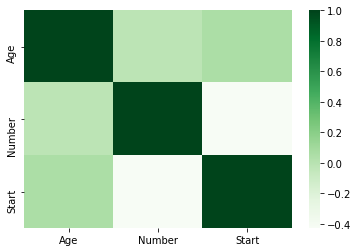

In [5]:
sns.heatmap((df.corr()), cmap="Greens")

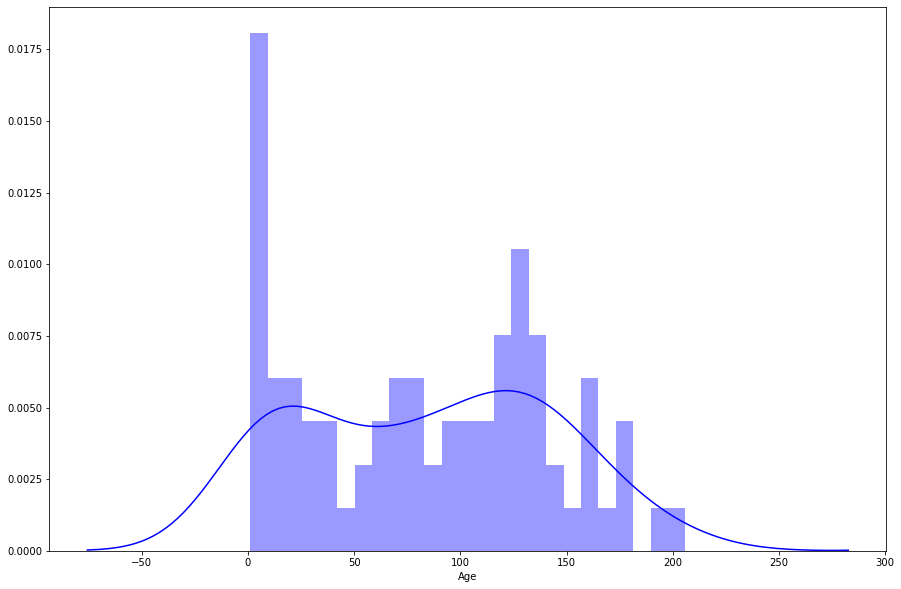

In [6]:
plt.figure(figsize=(15,10))
sns.distplot(df['Age'], bins=25, color='blue')

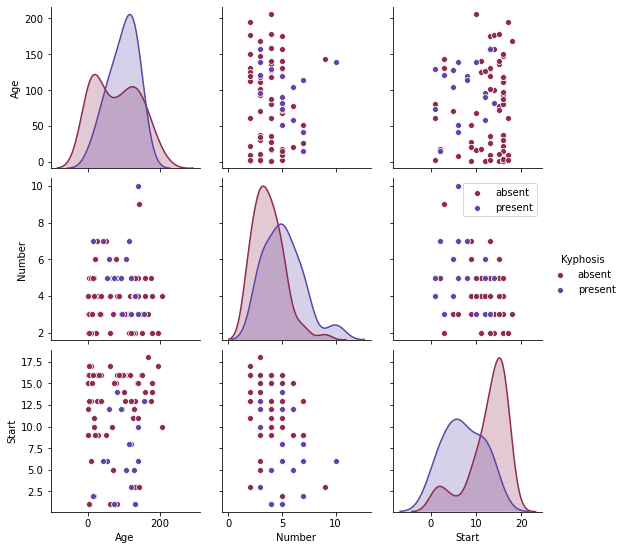

In [7]:
sns.pairplot(df,hue='Kyphosis', palette='twilight_r')
plt.legend()

In [8]:
df.groupby(['Kyphosis']).describe().T

Kyphosis          absent     present
Age    count   64.000000   17.000000
       mean    79.890625   97.823529
       std     61.861114   39.275048
       min      1.000000   15.000000
       25%     18.000000   73.000000
       50%     79.000000  105.000000
       75%    131.000000  128.000000
       max    206.000000  157.000000
Number count   64.000000   17.000000
       mean     3.750000    5.176471
       std      1.414214    1.878673
       min      2.000000    3.000000
       25%      3.000000    4.000000
       50%      4.000000    5.000000
       75%      5.000000    6.000000
       max      9.000000   10.000000
Start  count   64.000000   17.000000
       mean    12.609375    7.294118
       std      4.427967    4.283175
       min      1.000000    1.000000
       25%     11.000000    5.000000
       50%     14.000000    6.000000
       75%     16.000000   12.000000
       max     18.000000   14.000000

In [9]:
df.skew().T

Age       0.054317
Number    1.131390
Start    -0.885926
dtype: float64

In [10]:
df.groupby(['Kyphosis']).skew().T

Kyphosis,absent,present
Age,0.203509,-0.562174
Number,1.086186,0.929513
Start,-1.393117,0.057306


### Split features and labels

In [11]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

### Split train and test data 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

#### MinMax scaling is applied to normalize the data, so that different features present in dataset having different ranges are scaled to similar ranges.

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
X_train[:5], X_test[:5]

(array([[0.32682927, 0.375     , 0.52941176],
        [0.        , 0.125     , 0.47058824],
        [0.69268293, 0.875     , 0.11764706],
        [0.76097561, 0.125     , 0.70588235],
        [0.67317073, 0.125     , 0.52941176]]),
 array([[0.90721649, 0.        , 0.8125    ],
        [0.58247423, 1.        , 0.4375    ],
        [0.41752577, 0.6       , 0.8125    ],
        [0.01546392, 0.2       , 0.9375    ],
        [0.18041237, 0.4       , 0.75      ]]))

In [15]:
X_train.shape, X_test.shape

((64, 3), (17, 3))

In [16]:
Counter(y_train), Counter(y_test)

(Counter({'absent': 51, 'present': 13}), Counter({'absent': 13, 'present': 4}))

## Random Forest

#### check for random forest with different hyperparameters

In [17]:
num_of_trees = list(range(2,20,2))
rf_scores = []
for n in num_of_trees:
   rf = RandomForestClassifier(n_estimators=n, random_state=42)
   rf.fit(X_train, y_train)
   rf_score = cross_val_score(rf, X, y, cv=3, scoring='accuracy')
   rf_scores.append(rf_score.mean())

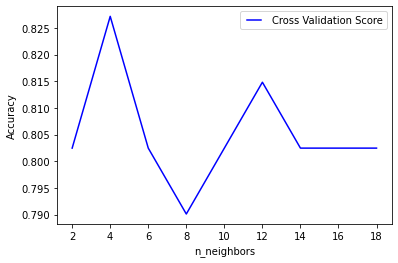

In [18]:
line1, = plt.plot(num_of_trees, rf_scores, 'b', label="Cross Validation Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

In [19]:
rfc = RandomForestClassifier(n_estimators=4, random_state=42)

In [20]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=42)

In [21]:
rfc_test_pred = rfc.predict(X_test)
rfc_train_pred = rfc.predict(X_train)

### Calculate accuracy measures

In [22]:
print("Test Accuracy: ",100*round(accuracy_score(y_test,rfc_test_pred),5), " %")

Test Accuracy:  94.118  %


In [23]:
print(confusion_matrix(y_test,rfc_test_pred))
print('\n')
print(classification_report(y_test,rfc_test_pred))

[[13  0]
 [ 1  3]]


              precision    recall  f1-score   support

      absent       0.93      1.00      0.96        13
     present       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.88      0.91        17
weighted avg       0.95      0.94      0.94        17



## KNN

#### test KNN with different neighbor values 

In [24]:
neighbors = list(range(2,15))
scores = []
for n in neighbors:
   knn = KNeighborsClassifier(n_neighbors=n)
   knn.fit(X_train, y_train)
   score = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
   scores.append(score.mean())

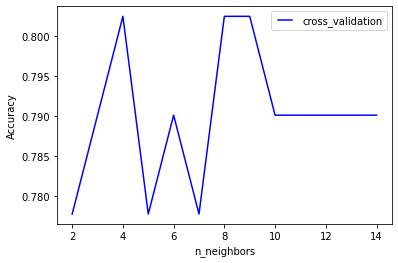

In [25]:
line1, = plt.plot(neighbors, scores, 'b', label="cross_validation")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=4)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
knn_y_pred = knn.predict(X_test)

### Accuracy measures Calculation

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy: ",100*round(accuracy_score(y_test,knn_y_pred),5), " %")

Test Accuracy:  88.235  %


In [28]:
print(confusion_matrix(y_test,knn_y_pred))
print('\n')
print(classification_report(y_test,knn_y_pred))

[[13  0]
 [ 2  2]]


              precision    recall  f1-score   support

      absent       0.87      1.00      0.93        13
     present       1.00      0.50      0.67         4

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17



### Accuracy Comparison and Inference